In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [4]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
Price = train.SalePrice

In [6]:
Price.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
Price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
Price.mean()

180921.19589041095

<AxesSubplot:ylabel='Frequency'>

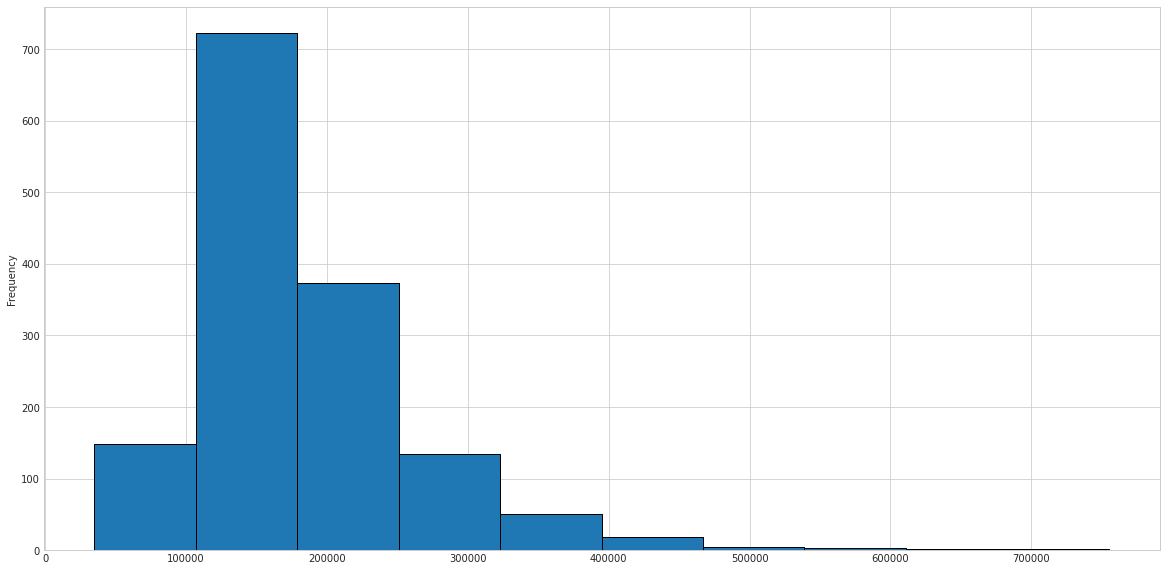

In [9]:
figsize = plt.figure(figsize = (20, 10))
Price.plot.hist(edgecolor = "black")

In [10]:
Price.sort_values(ascending = False)

691     755000
1182    745000
1169    625000
898     611657
803     582933
         ...  
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
Price.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

In [12]:
Price.skew()

1.8828757597682129

In [13]:
Price.isnull().sum()

0

In [14]:
PriceBins= pd.cut(Price, bins = 5)
PriceBins

0       (178920.0, 322940.0]
1       (178920.0, 322940.0]
2       (178920.0, 322940.0]
3        (34179.9, 178920.0]
4       (178920.0, 322940.0]
                ...         
1455     (34179.9, 178920.0]
1456    (178920.0, 322940.0]
1457    (178920.0, 322940.0]
1458     (34179.9, 178920.0]
1459     (34179.9, 178920.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (5, interval[float64, right]): [(34179.9, 178920.0] < (178920.0, 322940.0] < (322940.0, 466960.0] < (466960.0, 610980.0] < (610980.0, 755000.0]]

In [15]:
df = pd.DataFrame(Price)
df

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [16]:
df["PriceBins"] = pd.DataFrame(PriceBins)
df.sort_values(by = "SalePrice")

,SalePrice,PriceBins
495,34900,"(34179.9, 178920.0]"
916,35311,"(34179.9, 178920.0]"
968,37900,"(34179.9, 178920.0]"
533,39300,"(34179.9, 178920.0]"
30,40000,"(34179.9, 178920.0]"
...,...,...
803,582933,"(466960.0, 610980.0]"
898,611657,"(610980.0, 755000.0]"
1169,625000,"(610980.0, 755000.0]"
1182,745000,"(610980.0, 755000.0]"


In [17]:
df.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [18]:
df = df.sort_index(ascending = True)
df

,SalePrice,PriceBins
0,208500,"(178920.0, 322940.0]"
1,181500,"(178920.0, 322940.0]"
2,223500,"(178920.0, 322940.0]"
3,140000,"(34179.9, 178920.0]"
4,250000,"(178920.0, 322940.0]"
...,...,...
1455,175000,"(34179.9, 178920.0]"
1456,210000,"(178920.0, 322940.0]"
1457,266500,"(178920.0, 322940.0]"
1458,142125,"(34179.9, 178920.0]"


In [19]:
df.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

<AxesSubplot:ylabel='Frequency'>

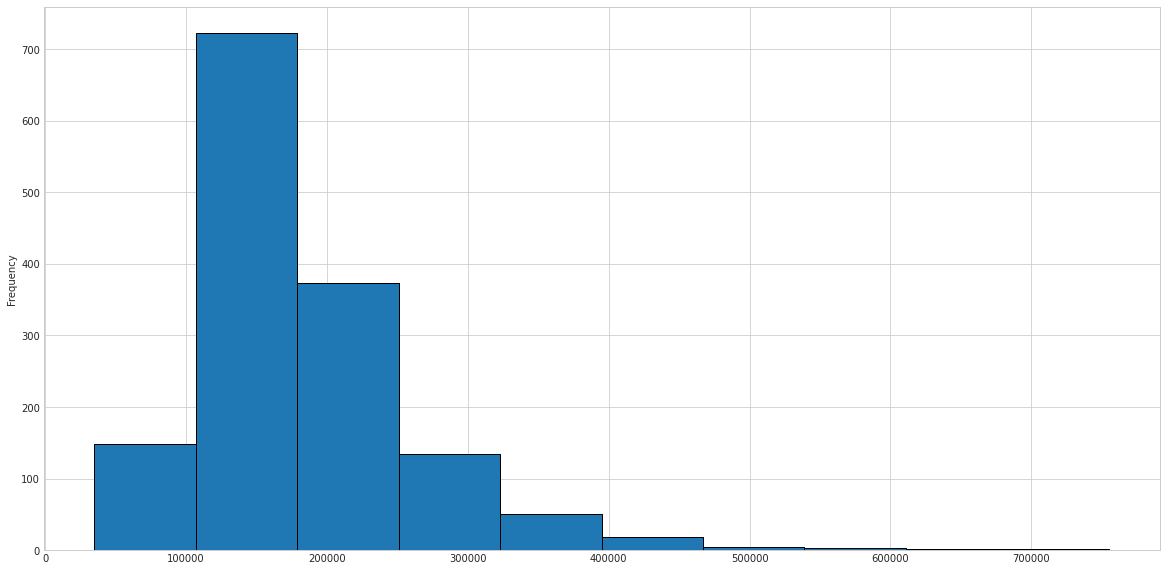

In [20]:
figsize = plt.figure(figsize = (20, 10))
Price.plot.hist(edgecolor = "black")

In [21]:
SalePrices = df.SalePrice.sum()
SalePrices

264144946

In [22]:
z = df.SalePrice

In [23]:
z

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [24]:
from sklearn import preprocessing
normalized_prices = preprocessing.normalize([z]) * 100
normalized_prices

array([[2.76171463, 2.40408252, 2.96039913, ..., 3.52996138, 1.88253569,
        1.95373097]])

In [25]:
normalized_prices.dtype

dtype('float64')

<AxesSubplot:>

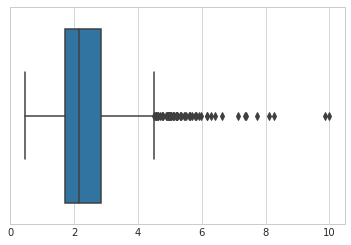

In [26]:
sns.boxplot(normalized_prices)

<AxesSubplot:xlabel='SalePrice'>

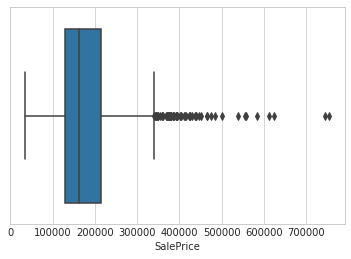

In [27]:
sns.boxplot(train.SalePrice)

In [30]:
from sklearn.neighbors import LocalOutlierFactor

X = df.SalePrice

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[208500 181500 223500 ... 266500 142125 147500].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs


X = df.SalePrice
y_pred = lof.fit_predict(X)
lofs_index = where(y_pred == -1)
values = x[lofs_index]
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color = 'r')

plt.show()

AttributeError: 'Series' object has no attribute 'novelty'

In [39]:
from sklearn.neighbors import LocalOutlierFactor as lof
from sklearn.datasets import make_blobs
X = df[df["SalePrice"]]

model = LocalOutlierFactor(n_neighbors=20) 
model.fit_predict(df.SalePrice)
threshold = quantile(lof, .03)
print(threshold)

KeyError: "None of [Int64Index([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,\n            129900, 118000,\n            ...\n            136000, 287090, 145000,  84500, 185000, 175000, 210000, 266500,\n            142125, 147500],\n           dtype='int64', length=1460)] are in the [columns]"

In [44]:
lof.fit_predict(df[df.SalePrice])

KeyError: "None of [Int64Index([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,\n            129900, 118000,\n            ...\n            136000, 287090, 145000,  84500, 185000, 175000, 210000, 266500,\n            142125, 147500],\n           dtype='int64', length=1460)] are in the [columns]"